## 파일불러온 후 spilt

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('C:/Users/lucky/바탕 화면/Capstone-Design/processed_data_2.xlsx',header=0)

In [3]:
data

,mod_d,region,town_t,apt_t,psu,sex,age,incm,ho_incm,incm5,...,LS_1YR,LK_EDU,LK_LB_CO,LK_LB_US,LK_LB_IT,LK_LB_EF,LF_secur_y,LF_BUYER,LF_SAFE,target
0,2020.03.05.,1,1,2,A901,1,80,1,1,2,...,1,2,1,2,88,8,1,2,1,1
1,2020.03.05.,1,1,2,A901,1,78,4,4,5,...,1,2,2,8,88,8,1,1,1,3
2,2020.03.05.,1,1,2,A901,2,75,4,4,5,...,2,2,2,8,88,8,1,1,1,3
3,2020.03.05.,1,1,2,A901,2,80,2,1,2,...,1,2,2,8,88,8,1,1,1,3
4,2020.03.05.,1,1,2,A901,2,71,1,1,2,...,2,1,2,8,88,8,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,2020.03.05.,8,1,2,R904,1,1,3,3,4,...,1,3,3,8,88,8,1,1,1,1
6074,2020.03.05.,8,1,2,R904,2,73,2,1,2,...,2,2,1,2,88,8,1,1,1,1
6075,2020.03.05.,8,1,2,R904,1,43,3,4,4,...,2,2,1,2,88,8,1,1,2,3
6076,2020.03.05.,8,1,2,R904,1,10,3,4,4,...,2,2,2,8,88,8,1,1,2,3


In [4]:
data.drop(['mod_d'], axis='columns', inplace=True)

In [5]:
data.drop(['psu'], axis='columns', inplace=True)

In [6]:
from sklearn.model_selection import train_test_split # train / test

In [7]:
y=data['target']
X=data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape)

(4862, 365) (1216, 365)


## lgbm

In [8]:
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
lgbm_clf = LGBMClassifier(random_state = 156)
lgbm_clf.fit(X_train,y_train)
pred=lgbm_clf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, pred)

In [11]:
print('lgbm 예측 정확도 : {0:.4f}'.format(accuracy))
print('\nLGBMClassifier 기본 하이퍼파라미터:\n', lgbm_clf.get_params())

lgbm 예측 정확도 : 0.7105

LGBMClassifier 기본 하이퍼파라미터:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 156, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


### - 하이퍼파라미터 튜닝

In [12]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier()

lgbm_param_grid = {
   'max_depth' : [4,5,6,7,8],
    'learning_rate' : [0.01,0.05,0.1,0.15,0.2],
    'n_estimators' : [100,200,300,400]
}

lgbm_grid = GridSearchCV(lgbm_clf, param_grid = lgbm_param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
lgbm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.9min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [13]:
print("최고 평균 정확도 : {0:.4f}".format(lgbm_grid.best_score_))
print("최고의 파라미터 : ", lgbm_grid.best_params_)

최고 평균 정확도 : 0.7264
최고의 파라미터 :  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}


In [14]:
cv_result_df = pd.DataFrame(lgbm_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [15]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
13,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.726449,1
6,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.725627,2
3,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.725421,3
18,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.725419,4
10,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.725215,5
14,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.725215,6
17,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.725214,7
9,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.724599,8
7,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.724393,9
20,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.724188,10


### - early stopping

In [16]:
lgbm_clf = LGBMClassifier(n_estimators=200, learning_rate=0.01,max_depth=7)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='multi_logloss', eval_set=evals, verbose=1)

[1]	valid_0's multi_logloss: 0.804959
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.803349
[3]	valid_0's multi_logloss: 0.801791
[4]	valid_0's multi_logloss: 0.800239
[5]	valid_0's multi_logloss: 0.79872
[6]	valid_0's multi_logloss: 0.797392
[7]	valid_0's multi_logloss: 0.796081
[8]	valid_0's multi_logloss: 0.794842
[9]	valid_0's multi_logloss: 0.79359
[10]	valid_0's multi_logloss: 0.792325
[11]	valid_0's multi_logloss: 0.791114
[12]	valid_0's multi_logloss: 0.789895
[13]	valid_0's multi_logloss: 0.788734
[14]	valid_0's multi_logloss: 0.787557
[15]	valid_0's multi_logloss: 0.786455
[16]	valid_0's multi_logloss: 0.785366
[17]	valid_0's multi_logloss: 0.784291
[18]	valid_0's multi_logloss: 0.783311
[19]	valid_0's multi_logloss: 0.782406
[20]	valid_0's multi_logloss: 0.781475
[21]	valid_0's multi_logloss: 0.780622
[22]	valid_0's multi_logloss: 0.779759
[23]	valid_0's multi_logloss: 0.778889
[24]	valid_0's multi_logloss: 0.777983
[25]	valid_0'

LGBMClassifier(learning_rate=0.01, max_depth=7, n_estimators=200)

## feature importance

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

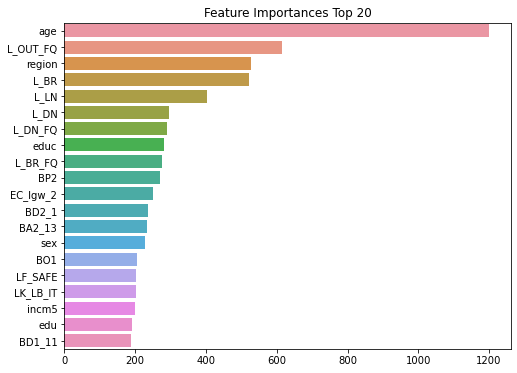

In [18]:
feature_importance_values = lgbm_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

## 모델 저장

In [27]:
import joblib

In [31]:
joblib.dump(lgbm_clf, 'lgb.pkl')

['lgb.pkl']

In [33]:
load_model = joblib.load('lgb.pkl')